In [3]:
!pip install librosa

# DATA ANALYSIS

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
filename='UrbanSound8K/dog_bark.wav'

In [6]:
import IPython.display as ipd
import librosa
import librosa.display

In [7]:
!dir

 Volume in drive D is Data
 Volume Serial Number is 64C1-79E3

 Directory of D:\

22-12-2021  06.16 AM    <DIR>          .ipynb_checkpoints
04-08-2019  05.00 AM    <DIR>          Drivers
10-11-2021  04.10 PM    <DIR>          files
21-09-2021  09.38 AM    <DIR>          IR controlled home automation-8
11-01-2022  10.16 AM    <DIR>          Movies
14-01-2022  07.35 PM    <DIR>          priya
17-06-2021  04.26 PM    <DIR>          Program Files
22-12-2021  06.15 AM         1,127,754 Review-2.ipynb
15-12-2021  08.14 PM    <DIR>          saved_models
14-12-2021  12.08 AM           166,580 Untitled.ipynb
18-01-2022  05.38 PM           325,986 untitled2.ipynb
15-12-2021  11.12 PM    <DIR>          UrbanSound8K
31-12-2021  08.20 PM    <DIR>          WindowsApps
17-06-2021  04.26 PM    <DIR>          WpSystem
09-01-2022  12.00 PM    <DIR>          WUDownloadCache
               3 File(s)      1,620,320 bytes
              12 Dir(s)  882,455,064,576 bytes free


In [89]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [90]:
wave_sample_rate

44100

In [91]:
wave_audio

array([[  139, -1275],
       [ 1962,  -125],
       [ 1211,  -168],
       ...,
       [-1346,   322],
       [ -246,  1127],
       [ -544,   -51]], dtype=int16)

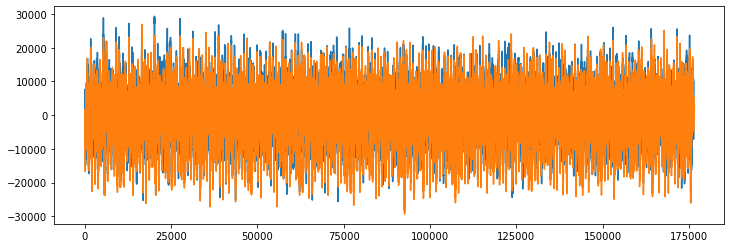

In [92]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

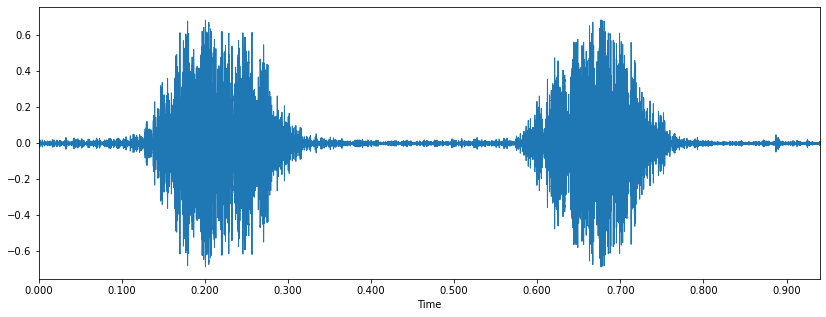

In [8]:
### Dog Sound
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

In [9]:
sample_rate

22050

In [10]:
data

array([-0.00274324, -0.00226056, -0.00111446, ...,  0.00106908,
        0.00128053,  0.00225282], dtype=float32)

In [11]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [12]:
wave_sample_rate

48000

In [13]:
wave_audio

array([-136,  -98,  -65, ...,   65,   76,   65], dtype=int16)

In [14]:
data

array([-0.00274324, -0.00226056, -0.00111446, ...,  0.00106908,
        0.00128053,  0.00225282], dtype=float32)

In [15]:
import pandas as pd

metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [16]:
metadata['class'].value_counts()

engine_idling       1000
street_music        1000
drilling            1000
dog_bark            1000
jackhammer          1000
children_playing    1000
air_conditioner     1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

# DATA PRE-PROCESSING

In [17]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='UrbanSound8K/100263-2-0-3.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)


In [18]:
print(librosa_audio_data)

[ 0.00330576  0.00468387  0.00360455 ... -0.0037562  -0.00348641
 -0.00356705]


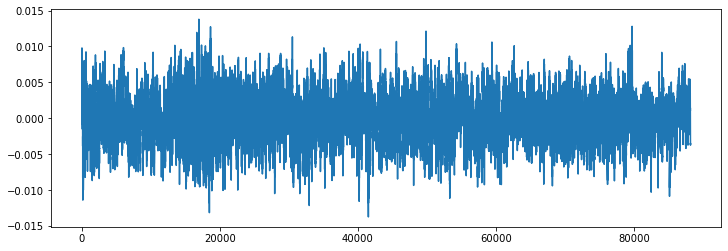

In [19]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [20]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [21]:
wave_audio

array([[ 194,  100],
       [ 179,  113],
       [ 160,  124],
       ...,
       [-143,  -87],
       [-134,  -91],
       [-110,  -98]], dtype=int16)

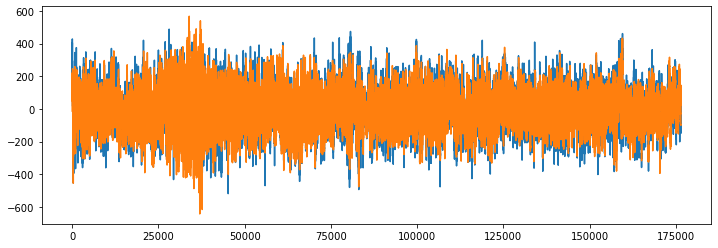

In [22]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

# FEATURE EXTRACTION

In [23]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [24]:
mfccs

array([[-4.45197296e+02, -4.47219299e+02, -4.49755127e+02, ...,
        -4.77412781e+02, -4.74241730e+02, -4.82704987e+02],
       [ 1.12513969e+02,  1.11970383e+02,  1.12244164e+02, ...,
         1.12045395e+02,  1.12248581e+02,  1.05560913e+02],
       [-1.58260956e+01, -2.30021858e+01, -3.12500191e+01, ...,
        -9.15442085e+00, -1.03232279e+01, -7.39410734e+00],
       ...,
       [-7.82766485e+00, -5.03880405e+00, -4.48165464e+00, ...,
        -1.90691590e-01,  4.34143829e+00,  1.00339069e+01],
       [-1.91763425e+00, -8.02737713e-01, -1.20930421e+00, ...,
        -1.23643339e-01,  2.90545225e-02,  9.22017097e-01],
       [-3.88130605e-01,  3.09317827e-01,  6.72155762e+00, ...,
        -2.33736658e+00, -4.25180149e+00, -2.31322765e+00]], dtype=float32)

In [25]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [26]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [27]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3554it [05:39, 11.39it/s]C:\Users\PRIYA LAKKU\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
8325it [13:22, 14.09it/s]C:\Users\PRIYA LAKKU\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
8328it [13:22, 16.53it/s]C:\Users\PRIYA LAKKU\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
8732it [13:58, 10.41it/s]


In [28]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.091328,...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01073, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265694,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.608585, 1....",children_playing


# Train Test And Split

In [29]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [30]:
X.shape

(8732, 40)

In [31]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [32]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [33]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [34]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [35]:
X_train

array([[-1.3183614e+02,  1.1397464e+02, -2.3956861e+01, ...,
         3.3314774e+00, -1.4786109e+00,  2.8736603e+00],
       [-1.4074220e+01,  9.1916939e+01, -8.6787214e+00, ...,
        -3.3844023e+00, -5.2119040e+00, -1.5936136e+00],
       [-4.9532028e+01,  1.5521857e-01, -2.0369110e+01, ...,
         2.0491767e+00, -8.0537474e-01,  2.7793026e+00],
       ...,
       [-4.2699332e+02,  9.2890656e+01,  3.0233388e+00, ...,
         8.6335975e-01,  6.4766806e-01,  7.8490508e-01],
       [-1.4607024e+02,  1.3709459e+02, -3.4298344e+01, ...,
         1.3777870e+00, -1.9530845e+00, -8.9652133e-01],
       [-4.2167450e+02,  2.1169032e+02,  2.6820304e+00, ...,
        -5.1484952e+00, -3.6400862e+00, -1.3321608e+00]], dtype=float32)

In [36]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [37]:
X_train.shape

(6985, 40)

In [38]:
X_test.shape

(1747, 40)

In [39]:
y_train.shape

(6985, 10)

In [40]:
y_test.shape

(1747, 10)

# Model 

In [41]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [43]:
### No of classes
num_labels=y.shape[1]

In [44]:
Dense()

TypeError: __init__() missing 1 required positional argument: 'units'

In [45]:
model=Sequential()
###first layer
model.add(Dense(256,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               10496     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               6

In [47]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [48]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
213/219 [============================>.] - ETA: 0s - loss: 8.0648 - accuracy: 0.1466
Epoch 00001: val_loss improved from inf to 2.11556, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 3s 11ms/step - loss: 7.9324 - accuracy: 0.1477 - val_loss: 2.1156 - val_accuracy: 0.2490
Epoch 2/100
218/219 [============================>.] - ETA: 0s - loss: 2.4429 - accuracy: 0.2084
Epoch 00002: val_loss improved from 2.11556 to 2.03347, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 2s 10ms/step - loss: 2.4424 - accuracy: 0.2084 - val_loss: 2.0335 - val_accuracy: 0.3108
Epoch 3/100
211/219 [===========================>..] - ETA: 0s - loss: 2.1560 - accuracy: 0.2435
Epoch 00003: val_loss improved from 2.03347 to 1.92179, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 2s 9ms/step - loss: 2.1556 - accuracy: 0.2440 - val_loss: 1.9218 - val_ac

In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

# MODEL TESTING

In [69]:
filename="UrbanSound8K/childs.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=np.argmax(model.predict(mfccs_scaled_features), axis=-1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[[-3.6673660e+02  1.3503891e+02 -4.2616154e+01  1.6085056e+01
  -2.2375364e+01  9.1354361e+00 -1.9351471e+01  4.8132019e+00
  -1.0816058e+01  1.0070497e+01 -9.6575966e+00 -3.7269032e+00
  -1.2884995e+01  5.1683006e+00 -7.4820943e+00 -4.2542825e+00
  -1.1013007e+00 -4.5083997e-01 -1.4741901e+00  1.2964101e+00
  -4.3857333e-01 -1.0769862e+00 -2.9204769e+00 -2.5535488e+00
  -9.9449927e-01 -2.8227601e+00 -4.1575103e+00 -1.4736261e+00
   1.2933216e+00 -2.3706808e+00 -5.1770988e+00 -5.9800525e+00
  -2.0016951e-02 -1.5042423e+00  2.2850301e-02 -1.4173561e+00
  -1.7186699e+00 -3.7543144e+00 -2.1987939e+00 -3.3046384e+00]]
(1, 40)
[2]


array(['children_playing'], dtype='<U16')

In [53]:
#test data accuracy
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.8460217714309692


In [93]:
#train data accuracy
train_accuracy=model.evaluate(X_train,y_train,verbose=0)
print(train_accuracy[1])


0.896349310874939


In [82]:
def print_prediction(filename):
    audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
    predicted_label=np.argmax(model.predict(mfccs_scaled_features), axis=-1)
    prediction_class = labelencoder.inverse_transform(predicted_label) 
    print('The predicted class is',*prediction_class)

In [83]:
filename = 'UrbanSound8K/childs.wav'
print_prediction(filename)


The predicted class is children_playing


In [85]:
filename = 'UrbanSound8K/Test data/9223-2-0-2.wav'
print_prediction(filename)

The predicted class is children_playing


In [86]:
filename = 'UrbanSound8K/Test data/57320-0-0-15.wav'
print_prediction(filename)

The predicted class is air_conditioner


In [87]:
filename = 'UrbanSound8K/Test data/17578-5-0-6.wav'
print_prediction(filename)

The predicted class is engine_idling
